## Implement a KNN model to classify the animals in to categorie

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sn

import warnings
warnings.filterwarnings('ignore')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
zoo= pd.read_csv('Zoo.csv')

In [3]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [4]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [5]:
zoo.isnull().sum().any()

False

In [6]:
zoo.duplicated().sum()

0

In [7]:
zoo['animal name'].duplicated().any()

True

In [8]:
zoo['animal name'].value_counts()

frog        2
pony        1
sealion     1
seal        1
seahorse    1
           ..
gorilla     1
goat        1
gnat        1
girl        1
wren        1
Name: animal name, Length: 100, dtype: int64

In [9]:
frog = zoo[zoo['animal name'] == 'frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


#### Frog can be of various types so i am considered as it is another types so i will rename it to frog 2

In [10]:
zoo['animal name'][(zoo['venomous'] == 1 )& (zoo['animal name'] == 'frog')] = "frog2"

In [11]:
frog = zoo[zoo['animal name'] == 'frog']
frog

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5


[]

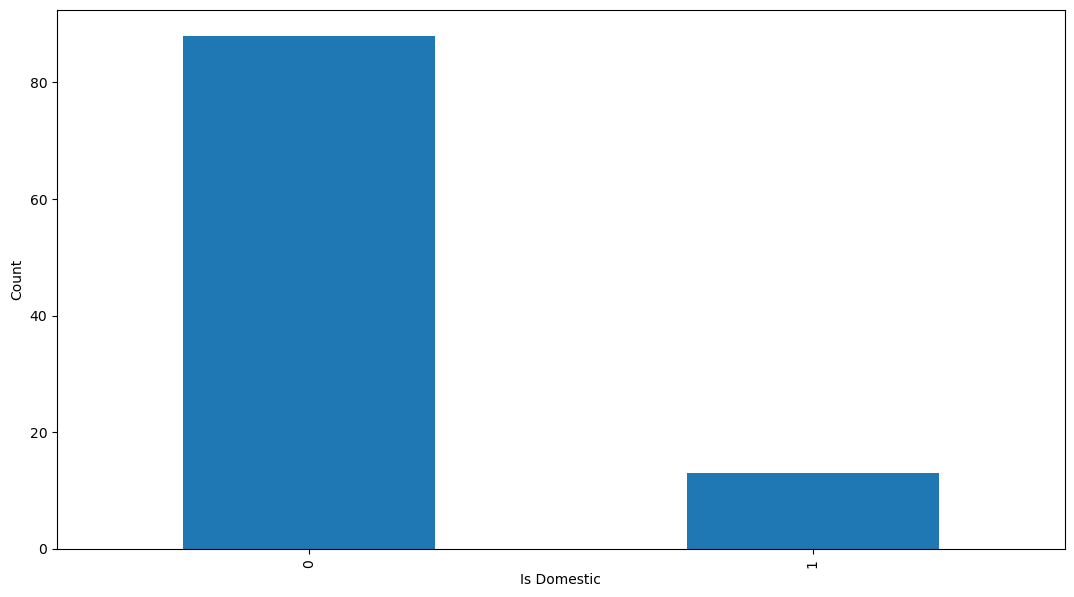

In [12]:
# Lets plot how many animals are domestic or not
plt.figure(figsize=(13,7));
zoo['domestic'].value_counts().plot(kind="bar");
plt.xlabel('Is Domestic');
plt.ylabel("Count");
plt.plot()

> Most of animals are International

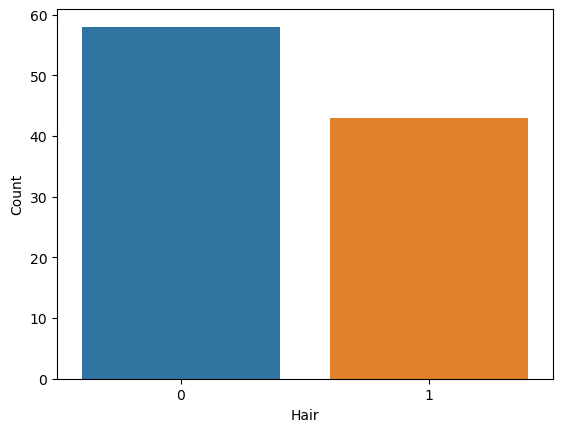

0    58
1    43
Name: hair, dtype: int64

In [13]:
sn.countplot(x="hair", data=zoo)
plt.xlabel("Hair")
plt.ylabel("Count")
plt.show()
zoo.loc[:,'hair'].value_counts()

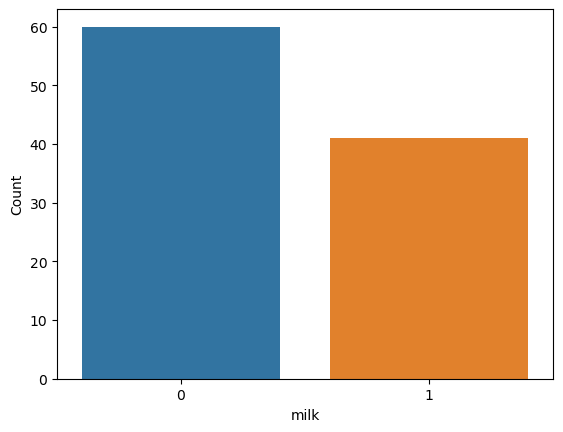

0    60
1    41
Name: milk, dtype: int64

In [14]:
sn.countplot(x="milk", data=zoo)
plt.xlabel("milk")
plt.ylabel("Count")
plt.show()
zoo.loc[:,'milk'].value_counts()

> Most of animals gives Milk 

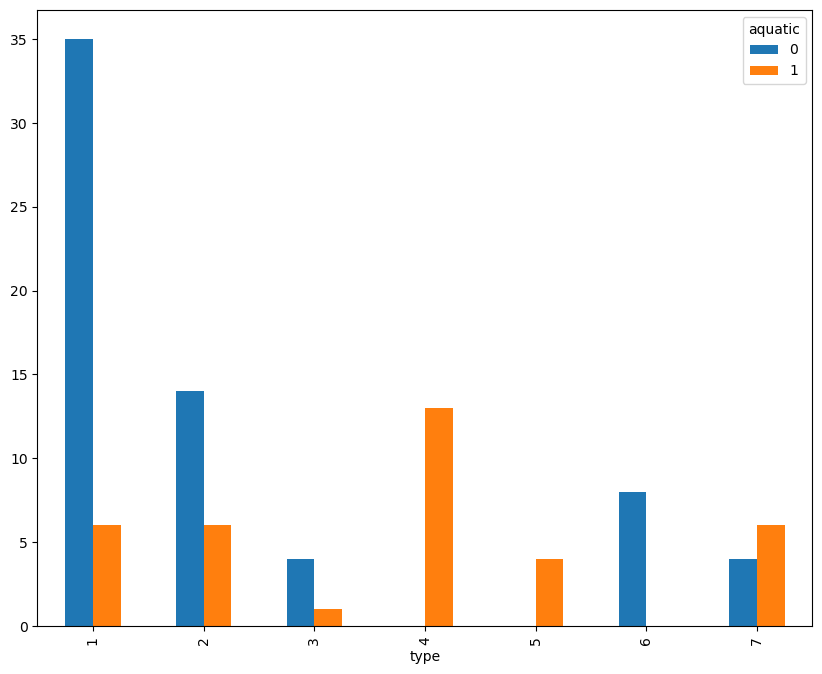

In [15]:
pd.crosstab(zoo['type'], zoo['aquatic']).plot(kind="bar", figsize=(10, 8));

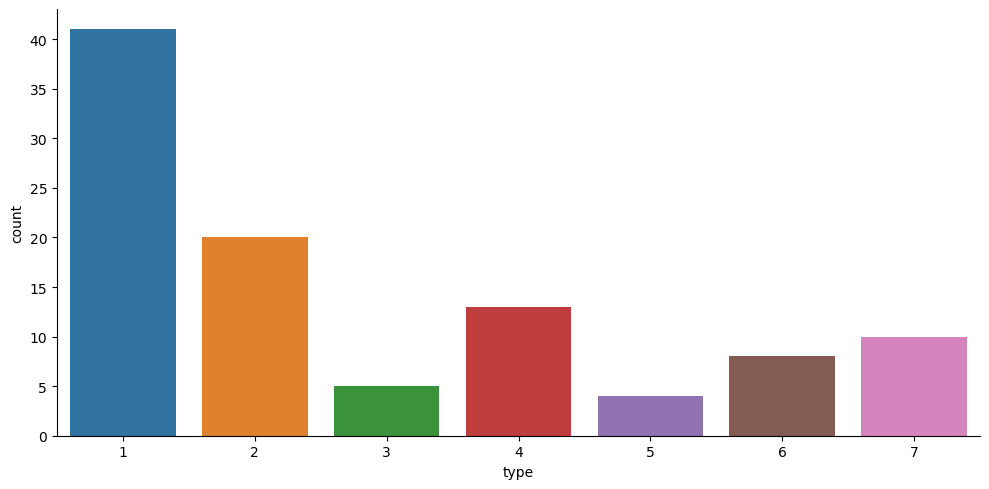

In [16]:
sn.factorplot('type', data=zoo, kind="count",size = 5,aspect = 2)

## Spilting into X and Y

In [17]:
X = zoo.iloc[:,1:17]
Y = zoo.iloc[:,17:]

In [18]:
Y.head()

,type
0,1
1,1
2,4
3,1
4,1


In [19]:
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [20]:
X_train, X_test , Y_train, Y_test = train_test_split(X,Y, test_size =.25, random_state = 42)

## KNN model without Train and test spilt

## Hypertunning of Parameters

In [21]:
n_neighbors = np.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [22]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [23]:
print(grid.best_score_)
print(grid.best_params_)

0.97
{'n_neighbors': 1}


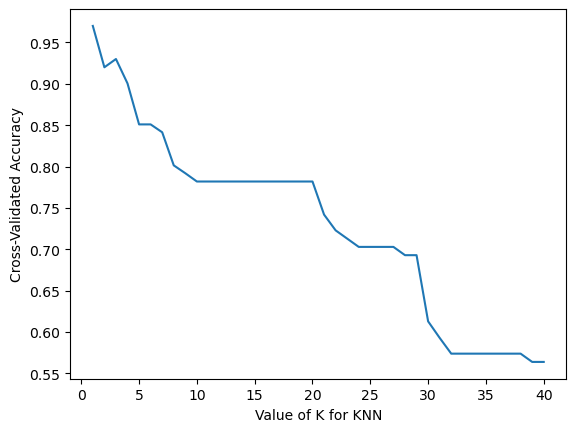

In [24]:
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [25]:
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X, Y, cv=5)
scores

array([1.  , 0.95, 0.95, 1.  , 0.95])

In [26]:
A = np.mean(scores)
A

0.97

In [27]:
np.sqrt(A)

0.9848857801796105

## Knn with train-test Spilt

In [28]:
# Create the model
model = KNeighborsClassifier() 

# Define the grid search parameters
tuned_paramerters= ({'n_neighbors':[1,2,3,4,5,6,7,8,9],
                     'weights':['uniform','distance'],
                     'algorithm':['ball_tree','kd_tree','brute'],
                     'p': [0,1,2],
                     'leaf_size':[5,10,15,20,25,30,35]}) 

param_grid = tuned_paramerters

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)

In [29]:
grid_result= grid.fit(X_train,Y_train)

Fitting 5 folds for each of 1134 candidates, totalling 5670 fits
[CV 1/5; 1/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=1, p=0, weights=uniform
[CV 1/5; 1/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=1, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 2/5; 1/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=1, p=0, weights=uniform
[CV 2/5; 1/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=1, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 3/5; 1/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=1, p=0, weights=uniform
[CV 3/5; 1/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=1, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 4/5; 1/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=1, p=0, weights=uniform
[CV 4/5; 1/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=1, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 5/5; 1/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=1, p=0

[CV 4/5; 8/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=2, p=0, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 8/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=2, p=0, weights=distance
[CV 5/5; 8/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=2, p=0, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 9/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=2, p=1, weights=uniform
[CV 1/5; 9/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=2, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 2/5; 9/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=2, p=1, weights=uniform
[CV 2/5; 9/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=2, p=1, weights=uniform;, score=0.933 total time=   0.0s
[CV 3/5; 9/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=2, p=1, weights=uniform
[CV 3/5; 9/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=2, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5; 

[CV 3/5; 21/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=4, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5; 21/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=4, p=1, weights=uniform
[CV 4/5; 21/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=4, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5; 21/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=4, p=1, weights=uniform
[CV 5/5; 21/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=4, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 1/5; 22/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=4, p=1, weights=distance
[CV 1/5; 22/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=4, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 22/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=4, p=1, weights=distance
[CV 2/5; 22/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=4, p=1, weights=distance;, score=1.000 total time=   

[CV 3/5; 36/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=6, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 36/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=6, p=2, weights=distance
[CV 4/5; 36/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=6, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 36/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=6, p=2, weights=distance
[CV 5/5; 36/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=6, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 1/5; 37/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=7, p=0, weights=uniform
[CV 1/5; 37/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=7, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 2/5; 37/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=7, p=0, weights=uniform
[CV 2/5; 37/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=7, p=0, weights=uniform;, score=nan total time=   0.0

[CV 4/5; 51/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=9, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5; 51/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=9, p=1, weights=uniform
[CV 5/5; 51/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=9, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 1/5; 52/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=9, p=1, weights=distance
[CV 1/5; 52/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=9, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 52/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=9, p=1, weights=distance
[CV 2/5; 52/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=9, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 3/5; 52/1134] START algorithm=ball_tree, leaf_size=5, n_neighbors=9, p=1, weights=distance
[CV 3/5; 52/1134] END algorithm=ball_tree, leaf_size=5, n_neighbors=9, p=1, weights=distance;, score=1.000 total time= 

[CV 3/5; 64/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=2, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 64/1134] START algorithm=ball_tree, leaf_size=10, n_neighbors=2, p=1, weights=distance
[CV 4/5; 64/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=2, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 5/5; 64/1134] START algorithm=ball_tree, leaf_size=10, n_neighbors=2, p=1, weights=distance
[CV 5/5; 64/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=2, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 65/1134] START algorithm=ball_tree, leaf_size=10, n_neighbors=2, p=2, weights=uniform
[CV 1/5; 65/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=2, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5; 65/1134] START algorithm=ball_tree, leaf_size=10, n_neighbors=2, p=2, weights=uniform
[CV 2/5; 65/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=2, p=2, weights=uniform;, score=0.933 tota

[CV 5/5; 79/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 1/5; 80/1134] START algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=0, weights=distance
[CV 1/5; 80/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=0, weights=distance;, score=nan total time=   0.0s
[CV 2/5; 80/1134] START algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=0, weights=distance
[CV 2/5; 80/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=0, weights=distance;, score=nan total time=   0.0s
[CV 3/5; 80/1134] START algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=0, weights=distance
[CV 3/5; 80/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=0, weights=distance;, score=nan total time=   0.0s
[CV 4/5; 80/1134] START algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=0, weights=distance
[CV 4/5; 80/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=5, p=0, weights=distance;, score=nan total time=

[CV 4/5; 87/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=6, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 5/5; 87/1134] START algorithm=ball_tree, leaf_size=10, n_neighbors=6, p=1, weights=uniform
[CV 5/5; 87/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=6, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 1/5; 88/1134] START algorithm=ball_tree, leaf_size=10, n_neighbors=6, p=1, weights=distance
[CV 1/5; 88/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=6, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 88/1134] START algorithm=ball_tree, leaf_size=10, n_neighbors=6, p=1, weights=distance
[CV 2/5; 88/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=6, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 3/5; 88/1134] START algorithm=ball_tree, leaf_size=10, n_neighbors=6, p=1, weights=distance
[CV 3/5; 88/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=6, p=1, weights=distance;, score=1.000 tot

[CV 4/5; 95/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5; 95/1134] START algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=2, weights=uniform
[CV 5/5; 95/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 1/5; 96/1134] START algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=2, weights=distance
[CV 1/5; 96/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5; 96/1134] START algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=2, weights=distance
[CV 2/5; 96/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=2, weights=distance;, score=0.733 total time=   0.0s
[CV 3/5; 96/1134] START algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=2, weights=distance
[CV 3/5; 96/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=7, p=2, weights=distance;, score=1.000 tot

[CV 2/5; 103/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 3/5; 103/1134] START algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=0, weights=uniform
[CV 3/5; 103/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 4/5; 103/1134] START algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=0, weights=uniform
[CV 4/5; 103/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 5/5; 103/1134] START algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=0, weights=uniform
[CV 5/5; 103/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 1/5; 104/1134] START algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=0, weights=distance
[CV 1/5; 104/1134] END algorithm=ball_tree, leaf_size=10, n_neighbors=9, p=0, weights=distance;, score=nan total ti

[CV 1/5; 111/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=1, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 2/5; 111/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=1, p=1, weights=uniform
[CV 2/5; 111/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=1, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 3/5; 111/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=1, p=1, weights=uniform
[CV 3/5; 111/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=1, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5; 111/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=1, p=1, weights=uniform
[CV 4/5; 111/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=1, p=1, weights=uniform;, score=0.933 total time=   0.0s
[CV 5/5; 111/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=1, p=1, weights=uniform
[CV 5/5; 111/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=1, p=1, weights=uniform;, score=0.933 

[CV 5/5; 118/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=2, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 119/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=2, p=2, weights=uniform
[CV 1/5; 119/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=2, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5; 119/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=2, p=2, weights=uniform
[CV 2/5; 119/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=2, p=2, weights=uniform;, score=0.933 total time=   0.0s
[CV 3/5; 119/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=2, p=2, weights=uniform
[CV 3/5; 119/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=2, p=2, weights=uniform;, score=0.933 total time=   0.0s
[CV 4/5; 119/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=2, p=2, weights=uniform
[CV 4/5; 119/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=2, p=2, weights=uniform;, score=0.933

[CV 3/5; 126/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=3, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 126/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=3, p=2, weights=distance
[CV 4/5; 126/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=3, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 126/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=3, p=2, weights=distance
[CV 5/5; 126/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=3, p=2, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 127/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=0, weights=uniform
[CV 1/5; 127/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 2/5; 127/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=0, weights=uniform
[CV 2/5; 127/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=4, p=0, weights=uniform;, score=nan

[CV 1/5; 135/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=5, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5; 135/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=5, p=1, weights=uniform
[CV 2/5; 135/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=5, p=1, weights=uniform;, score=0.733 total time=   0.0s
[CV 3/5; 135/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=5, p=1, weights=uniform
[CV 3/5; 135/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=5, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5; 135/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=5, p=1, weights=uniform
[CV 4/5; 135/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=5, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5; 135/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=5, p=1, weights=uniform
[CV 5/5; 135/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=5, p=1, weights=uniform;, score=0.867 

[CV 3/5; 142/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=6, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 142/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=6, p=1, weights=distance
[CV 4/5; 142/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=6, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 142/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=6, p=1, weights=distance
[CV 5/5; 142/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=6, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 143/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=6, p=2, weights=uniform
[CV 1/5; 143/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=6, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 2/5; 143/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=6, p=2, weights=uniform
[CV 2/5; 143/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=6, p=2, weights=uniform;, score=0

[CV 4/5; 156/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=8, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 156/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=8, p=2, weights=distance
[CV 5/5; 156/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=8, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 1/5; 157/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=9, p=0, weights=uniform
[CV 1/5; 157/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=9, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 2/5; 157/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=9, p=0, weights=uniform
[CV 2/5; 157/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=9, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 3/5; 157/1134] START algorithm=ball_tree, leaf_size=15, n_neighbors=9, p=0, weights=uniform
[CV 3/5; 157/1134] END algorithm=ball_tree, leaf_size=15, n_neighbors=9, p=0, weights=uniform;, score=nan tot

[CV 2/5; 165/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=1, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 3/5; 165/1134] START algorithm=ball_tree, leaf_size=20, n_neighbors=1, p=1, weights=uniform
[CV 3/5; 165/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=1, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5; 165/1134] START algorithm=ball_tree, leaf_size=20, n_neighbors=1, p=1, weights=uniform
[CV 4/5; 165/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=1, p=1, weights=uniform;, score=0.933 total time=   0.0s
[CV 5/5; 165/1134] START algorithm=ball_tree, leaf_size=20, n_neighbors=1, p=1, weights=uniform
[CV 5/5; 165/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=1, p=1, weights=uniform;, score=0.933 total time=   0.0s
[CV 1/5; 166/1134] START algorithm=ball_tree, leaf_size=20, n_neighbors=1, p=1, weights=distance
[CV 1/5; 166/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=1, p=1, weights=distance;, score=0.86

[CV 1/5; 173/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=2, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5; 173/1134] START algorithm=ball_tree, leaf_size=20, n_neighbors=2, p=2, weights=uniform
[CV 2/5; 173/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=2, p=2, weights=uniform;, score=0.933 total time=   0.0s
[CV 3/5; 173/1134] START algorithm=ball_tree, leaf_size=20, n_neighbors=2, p=2, weights=uniform
[CV 3/5; 173/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=2, p=2, weights=uniform;, score=0.933 total time=   0.0s
[CV 4/5; 173/1134] START algorithm=ball_tree, leaf_size=20, n_neighbors=2, p=2, weights=uniform
[CV 4/5; 173/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=2, p=2, weights=uniform;, score=0.933 total time=   0.0s
[CV 5/5; 173/1134] START algorithm=ball_tree, leaf_size=20, n_neighbors=2, p=2, weights=uniform
[CV 5/5; 173/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=2, p=2, weights=uniform;, score=0.867 

[CV 3/5; 188/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=0, weights=distance;, score=nan total time=   0.0s
[CV 4/5; 188/1134] START algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=0, weights=distance
[CV 4/5; 188/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=0, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 188/1134] START algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=0, weights=distance
[CV 5/5; 188/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=0, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 189/1134] START algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=1, weights=uniform
[CV 1/5; 189/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5; 189/1134] START algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=1, weights=uniform
[CV 2/5; 189/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=5, p=1, weights=uniform;, score=0.733 t

[CV 4/5; 196/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=6, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 196/1134] START algorithm=ball_tree, leaf_size=20, n_neighbors=6, p=1, weights=distance
[CV 5/5; 196/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=6, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 197/1134] START algorithm=ball_tree, leaf_size=20, n_neighbors=6, p=2, weights=uniform
[CV 1/5; 197/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=6, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 2/5; 197/1134] START algorithm=ball_tree, leaf_size=20, n_neighbors=6, p=2, weights=uniform
[CV 2/5; 197/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=6, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 3/5; 197/1134] START algorithm=ball_tree, leaf_size=20, n_neighbors=6, p=2, weights=uniform
[CV 3/5; 197/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=6, p=2, weights=uniform;, score=0.9

[CV 2/5; 212/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=9, p=0, weights=distance;, score=nan total time=   0.0s
[CV 3/5; 212/1134] START algorithm=ball_tree, leaf_size=20, n_neighbors=9, p=0, weights=distance
[CV 3/5; 212/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=9, p=0, weights=distance;, score=nan total time=   0.0s
[CV 4/5; 212/1134] START algorithm=ball_tree, leaf_size=20, n_neighbors=9, p=0, weights=distance
[CV 4/5; 212/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=9, p=0, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 212/1134] START algorithm=ball_tree, leaf_size=20, n_neighbors=9, p=0, weights=distance
[CV 5/5; 212/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=9, p=0, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 213/1134] START algorithm=ball_tree, leaf_size=20, n_neighbors=9, p=1, weights=uniform
[CV 1/5; 213/1134] END algorithm=ball_tree, leaf_size=20, n_neighbors=9, p=1, weights=uniform;, score=0.733 t

[CV 4/5; 219/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=1, p=1, weights=uniform;, score=0.933 total time=   0.0s
[CV 5/5; 219/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=1, p=1, weights=uniform
[CV 5/5; 219/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=1, p=1, weights=uniform;, score=0.933 total time=   0.0s
[CV 1/5; 220/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=1, p=1, weights=distance
[CV 1/5; 220/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=1, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 220/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=1, p=1, weights=distance
[CV 2/5; 220/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=1, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5; 220/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=1, p=1, weights=distance
[CV 3/5; 220/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=1, p=1, weights=distance;, score=

[CV 5/5; 227/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=2, p=2, weights=uniform;, score=0.867 total time=   0.0s
[CV 1/5; 228/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=2, p=2, weights=distance
[CV 1/5; 228/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=2, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 228/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=2, p=2, weights=distance
[CV 2/5; 228/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=2, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5; 228/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=2, p=2, weights=distance
[CV 3/5; 228/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=2, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 228/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=2, p=2, weights=distance
[CV 4/5; 228/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=2, p=2, weights=distance;, scor

[CV 3/5; 236/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=4, p=0, weights=distance;, score=nan total time=   0.0s
[CV 4/5; 236/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=4, p=0, weights=distance
[CV 4/5; 236/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=4, p=0, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 236/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=4, p=0, weights=distance
[CV 5/5; 236/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=4, p=0, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 237/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=4, p=1, weights=uniform
[CV 1/5; 237/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=4, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5; 237/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=4, p=1, weights=uniform
[CV 2/5; 237/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=4, p=1, weights=uniform;, score=0.867 t

[CV 5/5; 243/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=5, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 1/5; 244/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=5, p=1, weights=distance
[CV 1/5; 244/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=5, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 244/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=5, p=1, weights=distance
[CV 2/5; 244/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=5, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 3/5; 244/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=5, p=1, weights=distance
[CV 3/5; 244/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=5, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 244/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=5, p=1, weights=distance
[CV 4/5; 244/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=5, p=1, weights=distance;, scor

[CV 4/5; 251/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=6, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5; 251/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=6, p=2, weights=uniform
[CV 5/5; 251/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=6, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 1/5; 252/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=6, p=2, weights=distance
[CV 1/5; 252/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=6, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5; 252/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=6, p=2, weights=distance
[CV 2/5; 252/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=6, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 3/5; 252/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=6, p=2, weights=distance
[CV 3/5; 252/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=6, p=2, weights=distance;, score=

[CV 4/5; 259/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 5/5; 259/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=0, weights=uniform
[CV 5/5; 259/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 1/5; 260/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=0, weights=distance
[CV 1/5; 260/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=0, weights=distance;, score=nan total time=   0.0s
[CV 2/5; 260/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=0, weights=distance
[CV 2/5; 260/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=0, weights=distance;, score=nan total time=   0.0s
[CV 3/5; 260/1134] START algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=0, weights=distance
[CV 3/5; 260/1134] END algorithm=ball_tree, leaf_size=25, n_neighbors=8, p=0, weights=distance;, score=nan tota

[CV 3/5; 273/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=1, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5; 273/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=1, p=1, weights=uniform
[CV 4/5; 273/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=1, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 5/5; 273/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=1, p=1, weights=uniform
[CV 5/5; 273/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=1, p=1, weights=uniform;, score=0.933 total time=   0.0s
[CV 1/5; 274/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=1, p=1, weights=distance
[CV 1/5; 274/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=1, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 274/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=1, p=1, weights=distance
[CV 2/5; 274/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=1, p=1, weights=distance;, score=1.

[CV 1/5; 281/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=2, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5; 281/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=2, p=2, weights=uniform
[CV 2/5; 281/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=2, p=2, weights=uniform;, score=0.933 total time=   0.0s
[CV 3/5; 281/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=2, p=2, weights=uniform
[CV 3/5; 281/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=2, p=2, weights=uniform;, score=0.933 total time=   0.0s
[CV 4/5; 281/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=2, p=2, weights=uniform
[CV 4/5; 281/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=2, p=2, weights=uniform;, score=0.933 total time=   0.0s
[CV 5/5; 281/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=2, p=2, weights=uniform
[CV 5/5; 281/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=2, p=2, weights=uniform;, score=0.867 

[CV 2/5; 295/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 3/5; 295/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=0, weights=uniform
[CV 3/5; 295/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 4/5; 295/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=0, weights=uniform
[CV 4/5; 295/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 5/5; 295/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=0, weights=uniform
[CV 5/5; 295/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 1/5; 296/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=0, weights=distance
[CV 1/5; 296/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=5, p=0, weights=distance;, score=nan total ti

[CV 1/5; 303/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=6, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5; 303/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=6, p=1, weights=uniform
[CV 2/5; 303/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=6, p=1, weights=uniform;, score=0.733 total time=   0.0s
[CV 3/5; 303/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=6, p=1, weights=uniform
[CV 3/5; 303/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=6, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5; 303/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=6, p=1, weights=uniform
[CV 4/5; 303/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=6, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 5/5; 303/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=6, p=1, weights=uniform
[CV 5/5; 303/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=6, p=1, weights=uniform;, score=0.867 

[CV 3/5; 310/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 310/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, weights=distance
[CV 4/5; 310/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 310/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, weights=distance
[CV 5/5; 310/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 311/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, weights=uniform
[CV 1/5; 311/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 2/5; 311/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, weights=uniform
[CV 2/5; 311/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=7, p=2, weights=uniform;, score=0

[CV 3/5; 323/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=uniform;, score=0.933 total time=   0.0s
[CV 4/5; 323/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=uniform
[CV 4/5; 323/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5; 323/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=uniform
[CV 5/5; 323/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 1/5; 324/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=distance
[CV 1/5; 324/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5; 324/1134] START algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=distance
[CV 2/5; 324/1134] END algorithm=ball_tree, leaf_size=30, n_neighbors=9, p=2, weights=distance;, score=0.

[CV 3/5; 337/1134] END algorithm=ball_tree, leaf_size=35, n_neighbors=3, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 4/5; 337/1134] START algorithm=ball_tree, leaf_size=35, n_neighbors=3, p=0, weights=uniform
[CV 4/5; 337/1134] END algorithm=ball_tree, leaf_size=35, n_neighbors=3, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 5/5; 337/1134] START algorithm=ball_tree, leaf_size=35, n_neighbors=3, p=0, weights=uniform
[CV 5/5; 337/1134] END algorithm=ball_tree, leaf_size=35, n_neighbors=3, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 1/5; 338/1134] START algorithm=ball_tree, leaf_size=35, n_neighbors=3, p=0, weights=distance
[CV 1/5; 338/1134] END algorithm=ball_tree, leaf_size=35, n_neighbors=3, p=0, weights=distance;, score=nan total time=   0.0s
[CV 2/5; 338/1134] START algorithm=ball_tree, leaf_size=35, n_neighbors=3, p=0, weights=distance
[CV 2/5; 338/1134] END algorithm=ball_tree, leaf_size=35, n_neighbors=3, p=0, weights=distance;, score=nan total 

[CV 1/5; 345/1134] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5; 345/1134] START algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1, weights=uniform
[CV 2/5; 345/1134] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 3/5; 345/1134] START algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1, weights=uniform
[CV 3/5; 345/1134] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5; 345/1134] START algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1, weights=uniform
[CV 4/5; 345/1134] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 5/5; 345/1134] START algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1, weights=uniform
[CV 5/5; 345/1134] END algorithm=ball_tree, leaf_size=35, n_neighbors=4, p=1, weights=uniform;, score=0.867 

[CV 4/5; 352/1134] END algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 352/1134] START algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=1, weights=distance
[CV 5/5; 352/1134] END algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 353/1134] START algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2, weights=uniform
[CV 1/5; 353/1134] END algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 2/5; 353/1134] START algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2, weights=uniform
[CV 2/5; 353/1134] END algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 3/5; 353/1134] START algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2, weights=uniform
[CV 3/5; 353/1134] END algorithm=ball_tree, leaf_size=35, n_neighbors=5, p=2, weights=uniform;, score=1.0

[CV 4/5; 366/1134] END algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 366/1134] START algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=2, weights=distance
[CV 5/5; 366/1134] END algorithm=ball_tree, leaf_size=35, n_neighbors=7, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 1/5; 367/1134] START algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=0, weights=uniform
[CV 1/5; 367/1134] END algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 2/5; 367/1134] START algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=0, weights=uniform
[CV 2/5; 367/1134] END algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 3/5; 367/1134] START algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=0, weights=uniform
[CV 3/5; 367/1134] END algorithm=ball_tree, leaf_size=35, n_neighbors=8, p=0, weights=uniform;, score=nan tot

[CV 5/5; 381/1134] END algorithm=kd_tree, leaf_size=5, n_neighbors=1, p=1, weights=uniform;, score=0.933 total time=   0.0s
[CV 1/5; 382/1134] START algorithm=kd_tree, leaf_size=5, n_neighbors=1, p=1, weights=distance
[CV 1/5; 382/1134] END algorithm=kd_tree, leaf_size=5, n_neighbors=1, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 382/1134] START algorithm=kd_tree, leaf_size=5, n_neighbors=1, p=1, weights=distance
[CV 2/5; 382/1134] END algorithm=kd_tree, leaf_size=5, n_neighbors=1, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5; 382/1134] START algorithm=kd_tree, leaf_size=5, n_neighbors=1, p=1, weights=distance
[CV 3/5; 382/1134] END algorithm=kd_tree, leaf_size=5, n_neighbors=1, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 382/1134] START algorithm=kd_tree, leaf_size=5, n_neighbors=1, p=1, weights=distance
[CV 4/5; 382/1134] END algorithm=kd_tree, leaf_size=5, n_neighbors=1, p=1, weights=distance;, score=1.000 total time=   0.0s


[CV 2/5; 396/1134] END algorithm=kd_tree, leaf_size=5, n_neighbors=3, p=2, weights=distance;, score=0.933 total time=   0.0s
[CV 3/5; 396/1134] START algorithm=kd_tree, leaf_size=5, n_neighbors=3, p=2, weights=distance
[CV 3/5; 396/1134] END algorithm=kd_tree, leaf_size=5, n_neighbors=3, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 396/1134] START algorithm=kd_tree, leaf_size=5, n_neighbors=3, p=2, weights=distance
[CV 4/5; 396/1134] END algorithm=kd_tree, leaf_size=5, n_neighbors=3, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 396/1134] START algorithm=kd_tree, leaf_size=5, n_neighbors=3, p=2, weights=distance
[CV 5/5; 396/1134] END algorithm=kd_tree, leaf_size=5, n_neighbors=3, p=2, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 397/1134] START algorithm=kd_tree, leaf_size=5, n_neighbors=4, p=0, weights=uniform
[CV 1/5; 397/1134] END algorithm=kd_tree, leaf_size=5, n_neighbors=4, p=0, weights=uniform;, score=nan total time=   0.0s
[CV

[CV 3/5; 410/1134] END algorithm=kd_tree, leaf_size=5, n_neighbors=6, p=0, weights=distance;, score=nan total time=   0.0s
[CV 4/5; 410/1134] START algorithm=kd_tree, leaf_size=5, n_neighbors=6, p=0, weights=distance
[CV 4/5; 410/1134] END algorithm=kd_tree, leaf_size=5, n_neighbors=6, p=0, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 410/1134] START algorithm=kd_tree, leaf_size=5, n_neighbors=6, p=0, weights=distance
[CV 5/5; 410/1134] END algorithm=kd_tree, leaf_size=5, n_neighbors=6, p=0, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 411/1134] START algorithm=kd_tree, leaf_size=5, n_neighbors=6, p=1, weights=uniform
[CV 1/5; 411/1134] END algorithm=kd_tree, leaf_size=5, n_neighbors=6, p=1, weights=uniform;, score=0.733 total time=   0.0s
[CV 2/5; 411/1134] START algorithm=kd_tree, leaf_size=5, n_neighbors=6, p=1, weights=uniform
[CV 2/5; 411/1134] END algorithm=kd_tree, leaf_size=5, n_neighbors=6, p=1, weights=uniform;, score=0.733 total time=   0.0s
[CV 3/5; 

[CV 5/5; 423/1134] END algorithm=kd_tree, leaf_size=5, n_neighbors=8, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 1/5; 424/1134] START algorithm=kd_tree, leaf_size=5, n_neighbors=8, p=1, weights=distance
[CV 1/5; 424/1134] END algorithm=kd_tree, leaf_size=5, n_neighbors=8, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 424/1134] START algorithm=kd_tree, leaf_size=5, n_neighbors=8, p=1, weights=distance
[CV 2/5; 424/1134] END algorithm=kd_tree, leaf_size=5, n_neighbors=8, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 3/5; 424/1134] START algorithm=kd_tree, leaf_size=5, n_neighbors=8, p=1, weights=distance
[CV 3/5; 424/1134] END algorithm=kd_tree, leaf_size=5, n_neighbors=8, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 424/1134] START algorithm=kd_tree, leaf_size=5, n_neighbors=8, p=1, weights=distance
[CV 4/5; 424/1134] END algorithm=kd_tree, leaf_size=5, n_neighbors=8, p=1, weights=distance;, score=0.867 total time=   0.0s


[CV 2/5; 436/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=1, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5; 436/1134] START algorithm=kd_tree, leaf_size=10, n_neighbors=1, p=1, weights=distance
[CV 3/5; 436/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=1, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 436/1134] START algorithm=kd_tree, leaf_size=10, n_neighbors=1, p=1, weights=distance
[CV 4/5; 436/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=1, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 5/5; 436/1134] START algorithm=kd_tree, leaf_size=10, n_neighbors=1, p=1, weights=distance
[CV 5/5; 436/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=1, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 437/1134] START algorithm=kd_tree, leaf_size=10, n_neighbors=1, p=2, weights=uniform
[CV 1/5; 437/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=1, p=2, weights=uniform;, score=0.867 total time=

[CV 2/5; 449/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/5; 449/1134] START algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2, weights=uniform
[CV 3/5; 449/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5; 449/1134] START algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2, weights=uniform
[CV 4/5; 449/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2, weights=uniform;, score=0.867 total time=   0.0s
[CV 5/5; 449/1134] START algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2, weights=uniform
[CV 5/5; 449/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2, weights=uniform;, score=0.933 total time=   0.0s
[CV 1/5; 450/1134] START algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2, weights=distance
[CV 1/5; 450/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=3, p=2, weights=distance;, score=0.800 total time=   0.

[CV 2/5; 459/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=1, weights=uniform;, score=0.733 total time=   0.0s
[CV 3/5; 459/1134] START algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=1, weights=uniform
[CV 3/5; 459/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5; 459/1134] START algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=1, weights=uniform
[CV 4/5; 459/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 5/5; 459/1134] START algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=1, weights=uniform
[CV 5/5; 459/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 1/5; 460/1134] START algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=1, weights=distance
[CV 1/5; 460/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=5, p=1, weights=distance;, score=0.867 total time=   0.

[CV 3/5; 471/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1, weights=uniform;, score=0.933 total time=   0.0s
[CV 4/5; 471/1134] START algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1, weights=uniform
[CV 4/5; 471/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 5/5; 471/1134] START algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1, weights=uniform
[CV 5/5; 471/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 1/5; 472/1134] START algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1, weights=distance
[CV 1/5; 472/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 472/1134] START algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1, weights=distance
[CV 2/5; 472/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=7, p=1, weights=distance;, score=0.933 total time=   

[CV 1/5; 485/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 2/5; 485/1134] START algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=uniform
[CV 2/5; 485/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=uniform;, score=0.667 total time=   0.0s
[CV 3/5; 485/1134] START algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=uniform
[CV 3/5; 485/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=uniform;, score=0.933 total time=   0.0s
[CV 4/5; 485/1134] START algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=uniform
[CV 4/5; 485/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5; 485/1134] START algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=uniform
[CV 5/5; 485/1134] END algorithm=kd_tree, leaf_size=10, n_neighbors=9, p=2, weights=uniform;, score=0.667 total time=   0.0s

[CV 1/5; 498/1134] END algorithm=kd_tree, leaf_size=15, n_neighbors=2, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 498/1134] START algorithm=kd_tree, leaf_size=15, n_neighbors=2, p=2, weights=distance
[CV 2/5; 498/1134] END algorithm=kd_tree, leaf_size=15, n_neighbors=2, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5; 498/1134] START algorithm=kd_tree, leaf_size=15, n_neighbors=2, p=2, weights=distance
[CV 3/5; 498/1134] END algorithm=kd_tree, leaf_size=15, n_neighbors=2, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 498/1134] START algorithm=kd_tree, leaf_size=15, n_neighbors=2, p=2, weights=distance
[CV 4/5; 498/1134] END algorithm=kd_tree, leaf_size=15, n_neighbors=2, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 5/5; 498/1134] START algorithm=kd_tree, leaf_size=15, n_neighbors=2, p=2, weights=distance
[CV 5/5; 498/1134] END algorithm=kd_tree, leaf_size=15, n_neighbors=2, p=2, weights=distance;, score=0.933 total tim

[CV 2/5; 512/1134] END algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=0, weights=distance;, score=nan total time=   0.0s
[CV 3/5; 512/1134] START algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=0, weights=distance
[CV 3/5; 512/1134] END algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=0, weights=distance;, score=nan total time=   0.0s
[CV 4/5; 512/1134] START algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=0, weights=distance
[CV 4/5; 512/1134] END algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=0, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 512/1134] START algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=0, weights=distance
[CV 5/5; 512/1134] END algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=0, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 513/1134] START algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=1, weights=uniform
[CV 1/5; 513/1134] END algorithm=kd_tree, leaf_size=15, n_neighbors=5, p=1, weights=uniform;, score=0.800 total time=   0.0s


[CV 5/5; 524/1134] END algorithm=kd_tree, leaf_size=15, n_neighbors=7, p=0, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 525/1134] START algorithm=kd_tree, leaf_size=15, n_neighbors=7, p=1, weights=uniform
[CV 1/5; 525/1134] END algorithm=kd_tree, leaf_size=15, n_neighbors=7, p=1, weights=uniform;, score=0.733 total time=   0.0s
[CV 2/5; 525/1134] START algorithm=kd_tree, leaf_size=15, n_neighbors=7, p=1, weights=uniform
[CV 2/5; 525/1134] END algorithm=kd_tree, leaf_size=15, n_neighbors=7, p=1, weights=uniform;, score=0.733 total time=   0.0s
[CV 3/5; 525/1134] START algorithm=kd_tree, leaf_size=15, n_neighbors=7, p=1, weights=uniform
[CV 3/5; 525/1134] END algorithm=kd_tree, leaf_size=15, n_neighbors=7, p=1, weights=uniform;, score=0.933 total time=   0.0s
[CV 4/5; 525/1134] START algorithm=kd_tree, leaf_size=15, n_neighbors=7, p=1, weights=uniform
[CV 4/5; 525/1134] END algorithm=kd_tree, leaf_size=15, n_neighbors=7, p=1, weights=uniform;, score=0.867 total time=   0.0s


[CV 4/5; 537/1134] END algorithm=kd_tree, leaf_size=15, n_neighbors=9, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5; 537/1134] START algorithm=kd_tree, leaf_size=15, n_neighbors=9, p=1, weights=uniform
[CV 5/5; 537/1134] END algorithm=kd_tree, leaf_size=15, n_neighbors=9, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 1/5; 538/1134] START algorithm=kd_tree, leaf_size=15, n_neighbors=9, p=1, weights=distance
[CV 1/5; 538/1134] END algorithm=kd_tree, leaf_size=15, n_neighbors=9, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 538/1134] START algorithm=kd_tree, leaf_size=15, n_neighbors=9, p=1, weights=distance
[CV 2/5; 538/1134] END algorithm=kd_tree, leaf_size=15, n_neighbors=9, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 3/5; 538/1134] START algorithm=kd_tree, leaf_size=15, n_neighbors=9, p=1, weights=distance
[CV 3/5; 538/1134] END algorithm=kd_tree, leaf_size=15, n_neighbors=9, p=1, weights=distance;, score=1.000 total time= 

[CV 5/5; 551/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=2, p=2, weights=uniform;, score=0.867 total time=   0.0s
[CV 1/5; 552/1134] START algorithm=kd_tree, leaf_size=20, n_neighbors=2, p=2, weights=distance
[CV 1/5; 552/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=2, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 552/1134] START algorithm=kd_tree, leaf_size=20, n_neighbors=2, p=2, weights=distance
[CV 2/5; 552/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=2, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5; 552/1134] START algorithm=kd_tree, leaf_size=20, n_neighbors=2, p=2, weights=distance
[CV 3/5; 552/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=2, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 552/1134] START algorithm=kd_tree, leaf_size=20, n_neighbors=2, p=2, weights=distance
[CV 4/5; 552/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=2, p=2, weights=distance;, score=1.000 total time

[CV 1/5; 560/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=4, p=0, weights=distance;, score=nan total time=   0.0s
[CV 2/5; 560/1134] START algorithm=kd_tree, leaf_size=20, n_neighbors=4, p=0, weights=distance
[CV 2/5; 560/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=4, p=0, weights=distance;, score=nan total time=   0.0s
[CV 3/5; 560/1134] START algorithm=kd_tree, leaf_size=20, n_neighbors=4, p=0, weights=distance
[CV 3/5; 560/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=4, p=0, weights=distance;, score=nan total time=   0.0s
[CV 4/5; 560/1134] START algorithm=kd_tree, leaf_size=20, n_neighbors=4, p=0, weights=distance
[CV 4/5; 560/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=4, p=0, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 560/1134] START algorithm=kd_tree, leaf_size=20, n_neighbors=4, p=0, weights=distance
[CV 5/5; 560/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=4, p=0, weights=distance;, score=nan total time=   0.0s


[CV 5/5; 567/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 1/5; 568/1134] START algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=1, weights=distance
[CV 1/5; 568/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 568/1134] START algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=1, weights=distance
[CV 2/5; 568/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 3/5; 568/1134] START algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=1, weights=distance
[CV 3/5; 568/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 568/1134] START algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=1, weights=distance
[CV 4/5; 568/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=5, p=1, weights=distance;, score=0.867 total time

[CV 1/5; 582/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5; 582/1134] START algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=2, weights=distance
[CV 2/5; 582/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=2, weights=distance;, score=0.733 total time=   0.0s
[CV 3/5; 582/1134] START algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=2, weights=distance
[CV 3/5; 582/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 582/1134] START algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=2, weights=distance
[CV 4/5; 582/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 582/1134] START algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=2, weights=distance
[CV 5/5; 582/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=7, p=2, weights=distance;, score=0.867 total tim

[CV 5/5; 594/1134] END algorithm=kd_tree, leaf_size=20, n_neighbors=9, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 1/5; 595/1134] START algorithm=kd_tree, leaf_size=25, n_neighbors=1, p=0, weights=uniform
[CV 1/5; 595/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=1, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 2/5; 595/1134] START algorithm=kd_tree, leaf_size=25, n_neighbors=1, p=0, weights=uniform
[CV 2/5; 595/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=1, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 3/5; 595/1134] START algorithm=kd_tree, leaf_size=25, n_neighbors=1, p=0, weights=uniform
[CV 3/5; 595/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=1, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 4/5; 595/1134] START algorithm=kd_tree, leaf_size=25, n_neighbors=1, p=0, weights=uniform
[CV 4/5; 595/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=1, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 5/

[CV 3/5; 602/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=2, p=0, weights=distance;, score=nan total time=   0.0s
[CV 4/5; 602/1134] START algorithm=kd_tree, leaf_size=25, n_neighbors=2, p=0, weights=distance
[CV 4/5; 602/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=2, p=0, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 602/1134] START algorithm=kd_tree, leaf_size=25, n_neighbors=2, p=0, weights=distance
[CV 5/5; 602/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=2, p=0, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 603/1134] START algorithm=kd_tree, leaf_size=25, n_neighbors=2, p=1, weights=uniform
[CV 1/5; 603/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=2, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 2/5; 603/1134] START algorithm=kd_tree, leaf_size=25, n_neighbors=2, p=1, weights=uniform
[CV 2/5; 603/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=2, p=1, weights=uniform;, score=0.933 total time=   0.0s


[CV 3/5; 616/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=4, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 616/1134] START algorithm=kd_tree, leaf_size=25, n_neighbors=4, p=1, weights=distance
[CV 4/5; 616/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=4, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 5/5; 616/1134] START algorithm=kd_tree, leaf_size=25, n_neighbors=4, p=1, weights=distance
[CV 5/5; 616/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=4, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 617/1134] START algorithm=kd_tree, leaf_size=25, n_neighbors=4, p=2, weights=uniform
[CV 1/5; 617/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=4, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 2/5; 617/1134] START algorithm=kd_tree, leaf_size=25, n_neighbors=4, p=2, weights=uniform
[CV 2/5; 617/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=4, p=2, weights=uniform;, score=0.800 total time=  

[CV 1/5; 630/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=6, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5; 630/1134] START algorithm=kd_tree, leaf_size=25, n_neighbors=6, p=2, weights=distance
[CV 2/5; 630/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=6, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 3/5; 630/1134] START algorithm=kd_tree, leaf_size=25, n_neighbors=6, p=2, weights=distance
[CV 3/5; 630/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=6, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 630/1134] START algorithm=kd_tree, leaf_size=25, n_neighbors=6, p=2, weights=distance
[CV 4/5; 630/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=6, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 630/1134] START algorithm=kd_tree, leaf_size=25, n_neighbors=6, p=2, weights=distance
[CV 5/5; 630/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=6, p=2, weights=distance;, score=0.867 total tim

[CV 4/5; 640/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=8, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 640/1134] START algorithm=kd_tree, leaf_size=25, n_neighbors=8, p=1, weights=distance
[CV 5/5; 640/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=8, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 641/1134] START algorithm=kd_tree, leaf_size=25, n_neighbors=8, p=2, weights=uniform
[CV 1/5; 641/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=8, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 2/5; 641/1134] START algorithm=kd_tree, leaf_size=25, n_neighbors=8, p=2, weights=uniform
[CV 2/5; 641/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=8, p=2, weights=uniform;, score=0.667 total time=   0.0s
[CV 3/5; 641/1134] START algorithm=kd_tree, leaf_size=25, n_neighbors=8, p=2, weights=uniform
[CV 3/5; 641/1134] END algorithm=kd_tree, leaf_size=25, n_neighbors=8, p=2, weights=uniform;, score=0.933 total time=   0

[CV 2/5; 652/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=1, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5; 652/1134] START algorithm=kd_tree, leaf_size=30, n_neighbors=1, p=1, weights=distance
[CV 3/5; 652/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=1, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 652/1134] START algorithm=kd_tree, leaf_size=30, n_neighbors=1, p=1, weights=distance
[CV 4/5; 652/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=1, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 5/5; 652/1134] START algorithm=kd_tree, leaf_size=30, n_neighbors=1, p=1, weights=distance
[CV 5/5; 652/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=1, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 653/1134] START algorithm=kd_tree, leaf_size=30, n_neighbors=1, p=2, weights=uniform
[CV 1/5; 653/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=1, p=2, weights=uniform;, score=0.867 total time=

[CV 4/5; 664/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 5/5; 664/1134] START algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=1, weights=distance
[CV 5/5; 664/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 665/1134] START algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=uniform
[CV 1/5; 665/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5; 665/1134] START algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=uniform
[CV 2/5; 665/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/5; 665/1134] START algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=uniform
[CV 3/5; 665/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=3, p=2, weights=uniform;, score=1.000 total time=   0

[CV 1/5; 676/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 676/1134] START algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=1, weights=distance
[CV 2/5; 676/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 3/5; 676/1134] START algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=1, weights=distance
[CV 3/5; 676/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 676/1134] START algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=1, weights=distance
[CV 4/5; 676/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 676/1134] START algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=1, weights=distance
[CV 5/5; 676/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=5, p=1, weights=distance;, score=0.933 total tim

[CV 4/5; 688/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 688/1134] START algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=1, weights=distance
[CV 5/5; 688/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 689/1134] START algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=2, weights=uniform
[CV 1/5; 689/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 2/5; 689/1134] START algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=2, weights=uniform
[CV 2/5; 689/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 3/5; 689/1134] START algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=2, weights=uniform
[CV 3/5; 689/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=7, p=2, weights=uniform;, score=0.933 total time=   0

[CV 4/5; 702/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=9, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 702/1134] START algorithm=kd_tree, leaf_size=30, n_neighbors=9, p=2, weights=distance
[CV 5/5; 702/1134] END algorithm=kd_tree, leaf_size=30, n_neighbors=9, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 1/5; 703/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=1, p=0, weights=uniform
[CV 1/5; 703/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=1, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 2/5; 703/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=1, p=0, weights=uniform
[CV 2/5; 703/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=1, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 3/5; 703/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=1, p=0, weights=uniform
[CV 3/5; 703/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=1, p=0, weights=uniform;, score=nan total time=   0.0s
[C

[CV 2/5; 710/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=2, p=0, weights=distance;, score=nan total time=   0.0s
[CV 3/5; 710/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=2, p=0, weights=distance
[CV 3/5; 710/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=2, p=0, weights=distance;, score=nan total time=   0.0s
[CV 4/5; 710/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=2, p=0, weights=distance
[CV 4/5; 710/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=2, p=0, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 710/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=2, p=0, weights=distance
[CV 5/5; 710/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=2, p=0, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 711/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=2, p=1, weights=uniform
[CV 1/5; 711/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=2, p=1, weights=uniform;, score=0.867 total time=   0.0s


[CV 5/5; 717/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=3, p=1, weights=uniform;, score=0.933 total time=   0.0s
[CV 1/5; 718/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=3, p=1, weights=distance
[CV 1/5; 718/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=3, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 718/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=3, p=1, weights=distance
[CV 2/5; 718/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=3, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5; 718/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=3, p=1, weights=distance
[CV 3/5; 718/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=3, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 718/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=3, p=1, weights=distance
[CV 4/5; 718/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=3, p=1, weights=distance;, score=0.933 total time

[CV 1/5; 732/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=5, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5; 732/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=5, p=2, weights=distance
[CV 2/5; 732/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=5, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 3/5; 732/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=5, p=2, weights=distance
[CV 3/5; 732/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=5, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 732/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=5, p=2, weights=distance
[CV 4/5; 732/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=5, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 732/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=5, p=2, weights=distance
[CV 5/5; 732/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=5, p=2, weights=distance;, score=0.867 total tim

[CV 2/5; 747/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=8, p=1, weights=uniform;, score=0.733 total time=   0.0s
[CV 3/5; 747/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=8, p=1, weights=uniform
[CV 3/5; 747/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=8, p=1, weights=uniform;, score=0.933 total time=   0.0s
[CV 4/5; 747/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=8, p=1, weights=uniform
[CV 4/5; 747/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=8, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 5/5; 747/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=8, p=1, weights=uniform
[CV 5/5; 747/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=8, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 1/5; 748/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=8, p=1, weights=distance
[CV 1/5; 748/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=8, p=1, weights=distance;, score=0.867 total time=   0.

[CV 1/5; 755/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=9, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 2/5; 755/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=9, p=2, weights=uniform
[CV 2/5; 755/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=9, p=2, weights=uniform;, score=0.667 total time=   0.0s
[CV 3/5; 755/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=9, p=2, weights=uniform
[CV 3/5; 755/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=9, p=2, weights=uniform;, score=0.933 total time=   0.0s
[CV 4/5; 755/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=9, p=2, weights=uniform
[CV 4/5; 755/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=9, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5; 755/1134] START algorithm=kd_tree, leaf_size=35, n_neighbors=9, p=2, weights=uniform
[CV 5/5; 755/1134] END algorithm=kd_tree, leaf_size=35, n_neighbors=9, p=2, weights=uniform;, score=0.733 total time=   0.0s

[CV 5/5; 768/1134] END algorithm=brute, leaf_size=5, n_neighbors=2, p=2, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 769/1134] START algorithm=brute, leaf_size=5, n_neighbors=3, p=0, weights=uniform
[CV 1/5; 769/1134] END algorithm=brute, leaf_size=5, n_neighbors=3, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 2/5; 769/1134] START algorithm=brute, leaf_size=5, n_neighbors=3, p=0, weights=uniform
[CV 2/5; 769/1134] END algorithm=brute, leaf_size=5, n_neighbors=3, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 3/5; 769/1134] START algorithm=brute, leaf_size=5, n_neighbors=3, p=0, weights=uniform
[CV 3/5; 769/1134] END algorithm=brute, leaf_size=5, n_neighbors=3, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 4/5; 769/1134] START algorithm=brute, leaf_size=5, n_neighbors=3, p=0, weights=uniform
[CV 4/5; 769/1134] END algorithm=brute, leaf_size=5, n_neighbors=3, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 5/5; 769/1134] START algorith

[CV 1/5; 782/1134] END algorithm=brute, leaf_size=5, n_neighbors=5, p=0, weights=distance;, score=nan total time=   0.0s
[CV 2/5; 782/1134] START algorithm=brute, leaf_size=5, n_neighbors=5, p=0, weights=distance
[CV 2/5; 782/1134] END algorithm=brute, leaf_size=5, n_neighbors=5, p=0, weights=distance;, score=nan total time=   0.0s
[CV 3/5; 782/1134] START algorithm=brute, leaf_size=5, n_neighbors=5, p=0, weights=distance
[CV 3/5; 782/1134] END algorithm=brute, leaf_size=5, n_neighbors=5, p=0, weights=distance;, score=nan total time=   0.0s
[CV 4/5; 782/1134] START algorithm=brute, leaf_size=5, n_neighbors=5, p=0, weights=distance
[CV 4/5; 782/1134] END algorithm=brute, leaf_size=5, n_neighbors=5, p=0, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 782/1134] START algorithm=brute, leaf_size=5, n_neighbors=5, p=0, weights=distance
[CV 5/5; 782/1134] END algorithm=brute, leaf_size=5, n_neighbors=5, p=0, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 783/1134] START al

[CV 3/5; 796/1134] END algorithm=brute, leaf_size=5, n_neighbors=7, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 796/1134] START algorithm=brute, leaf_size=5, n_neighbors=7, p=1, weights=distance
[CV 4/5; 796/1134] END algorithm=brute, leaf_size=5, n_neighbors=7, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 796/1134] START algorithm=brute, leaf_size=5, n_neighbors=7, p=1, weights=distance
[CV 5/5; 796/1134] END algorithm=brute, leaf_size=5, n_neighbors=7, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 797/1134] START algorithm=brute, leaf_size=5, n_neighbors=7, p=2, weights=uniform
[CV 1/5; 797/1134] END algorithm=brute, leaf_size=5, n_neighbors=7, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 2/5; 797/1134] START algorithm=brute, leaf_size=5, n_neighbors=7, p=2, weights=uniform
[CV 2/5; 797/1134] END algorithm=brute, leaf_size=5, n_neighbors=7, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 3/5; 797/1134] ST

[CV 3/5; 811/1134] END algorithm=brute, leaf_size=10, n_neighbors=1, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 4/5; 811/1134] START algorithm=brute, leaf_size=10, n_neighbors=1, p=0, weights=uniform
[CV 4/5; 811/1134] END algorithm=brute, leaf_size=10, n_neighbors=1, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 5/5; 811/1134] START algorithm=brute, leaf_size=10, n_neighbors=1, p=0, weights=uniform
[CV 5/5; 811/1134] END algorithm=brute, leaf_size=10, n_neighbors=1, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 1/5; 812/1134] START algorithm=brute, leaf_size=10, n_neighbors=1, p=0, weights=distance
[CV 1/5; 812/1134] END algorithm=brute, leaf_size=10, n_neighbors=1, p=0, weights=distance;, score=nan total time=   0.0s
[CV 2/5; 812/1134] START algorithm=brute, leaf_size=10, n_neighbors=1, p=0, weights=distance
[CV 2/5; 812/1134] END algorithm=brute, leaf_size=10, n_neighbors=1, p=0, weights=distance;, score=nan total time=   0.0s
[CV 3/5; 812/1134] STAR

[CV 3/5; 825/1134] END algorithm=brute, leaf_size=10, n_neighbors=3, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5; 825/1134] START algorithm=brute, leaf_size=10, n_neighbors=3, p=1, weights=uniform
[CV 4/5; 825/1134] END algorithm=brute, leaf_size=10, n_neighbors=3, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 5/5; 825/1134] START algorithm=brute, leaf_size=10, n_neighbors=3, p=1, weights=uniform
[CV 5/5; 825/1134] END algorithm=brute, leaf_size=10, n_neighbors=3, p=1, weights=uniform;, score=0.933 total time=   0.0s
[CV 1/5; 826/1134] START algorithm=brute, leaf_size=10, n_neighbors=3, p=1, weights=distance
[CV 1/5; 826/1134] END algorithm=brute, leaf_size=10, n_neighbors=3, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 826/1134] START algorithm=brute, leaf_size=10, n_neighbors=3, p=1, weights=distance
[CV 2/5; 826/1134] END algorithm=brute, leaf_size=10, n_neighbors=3, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5; 826/

[CV 2/5; 833/1134] END algorithm=brute, leaf_size=10, n_neighbors=4, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/5; 833/1134] START algorithm=brute, leaf_size=10, n_neighbors=4, p=2, weights=uniform
[CV 3/5; 833/1134] END algorithm=brute, leaf_size=10, n_neighbors=4, p=2, weights=uniform;, score=0.933 total time=   0.0s
[CV 4/5; 833/1134] START algorithm=brute, leaf_size=10, n_neighbors=4, p=2, weights=uniform
[CV 4/5; 833/1134] END algorithm=brute, leaf_size=10, n_neighbors=4, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5; 833/1134] START algorithm=brute, leaf_size=10, n_neighbors=4, p=2, weights=uniform
[CV 5/5; 833/1134] END algorithm=brute, leaf_size=10, n_neighbors=4, p=2, weights=uniform;, score=0.867 total time=   0.0s
[CV 1/5; 834/1134] START algorithm=brute, leaf_size=10, n_neighbors=4, p=2, weights=distance
[CV 1/5; 834/1134] END algorithm=brute, leaf_size=10, n_neighbors=4, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5; 834/11

[CV 1/5; 848/1134] END algorithm=brute, leaf_size=10, n_neighbors=7, p=0, weights=distance;, score=nan total time=   0.0s
[CV 2/5; 848/1134] START algorithm=brute, leaf_size=10, n_neighbors=7, p=0, weights=distance
[CV 2/5; 848/1134] END algorithm=brute, leaf_size=10, n_neighbors=7, p=0, weights=distance;, score=nan total time=   0.0s
[CV 3/5; 848/1134] START algorithm=brute, leaf_size=10, n_neighbors=7, p=0, weights=distance
[CV 3/5; 848/1134] END algorithm=brute, leaf_size=10, n_neighbors=7, p=0, weights=distance;, score=nan total time=   0.0s
[CV 4/5; 848/1134] START algorithm=brute, leaf_size=10, n_neighbors=7, p=0, weights=distance
[CV 4/5; 848/1134] END algorithm=brute, leaf_size=10, n_neighbors=7, p=0, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 848/1134] START algorithm=brute, leaf_size=10, n_neighbors=7, p=0, weights=distance
[CV 5/5; 848/1134] END algorithm=brute, leaf_size=10, n_neighbors=7, p=0, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 849/1134]

[CV 3/5; 862/1134] END algorithm=brute, leaf_size=10, n_neighbors=9, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 862/1134] START algorithm=brute, leaf_size=10, n_neighbors=9, p=1, weights=distance
[CV 4/5; 862/1134] END algorithm=brute, leaf_size=10, n_neighbors=9, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 862/1134] START algorithm=brute, leaf_size=10, n_neighbors=9, p=1, weights=distance
[CV 5/5; 862/1134] END algorithm=brute, leaf_size=10, n_neighbors=9, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 863/1134] START algorithm=brute, leaf_size=10, n_neighbors=9, p=2, weights=uniform
[CV 1/5; 863/1134] END algorithm=brute, leaf_size=10, n_neighbors=9, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 2/5; 863/1134] START algorithm=brute, leaf_size=10, n_neighbors=9, p=2, weights=uniform
[CV 2/5; 863/1134] END algorithm=brute, leaf_size=10, n_neighbors=9, p=2, weights=uniform;, score=0.667 total time=   0.0s
[CV 3/5; 863

[CV 2/5; 870/1134] END algorithm=brute, leaf_size=15, n_neighbors=1, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5; 870/1134] START algorithm=brute, leaf_size=15, n_neighbors=1, p=2, weights=distance
[CV 3/5; 870/1134] END algorithm=brute, leaf_size=15, n_neighbors=1, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 870/1134] START algorithm=brute, leaf_size=15, n_neighbors=1, p=2, weights=distance
[CV 4/5; 870/1134] END algorithm=brute, leaf_size=15, n_neighbors=1, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 5/5; 870/1134] START algorithm=brute, leaf_size=15, n_neighbors=1, p=2, weights=distance
[CV 5/5; 870/1134] END algorithm=brute, leaf_size=15, n_neighbors=1, p=2, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 871/1134] START algorithm=brute, leaf_size=15, n_neighbors=2, p=0, weights=uniform
[CV 1/5; 871/1134] END algorithm=brute, leaf_size=15, n_neighbors=2, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 2/5; 871

[CV 5/5; 878/1134] END algorithm=brute, leaf_size=15, n_neighbors=3, p=0, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 879/1134] START algorithm=brute, leaf_size=15, n_neighbors=3, p=1, weights=uniform
[CV 1/5; 879/1134] END algorithm=brute, leaf_size=15, n_neighbors=3, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 2/5; 879/1134] START algorithm=brute, leaf_size=15, n_neighbors=3, p=1, weights=uniform
[CV 2/5; 879/1134] END algorithm=brute, leaf_size=15, n_neighbors=3, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 3/5; 879/1134] START algorithm=brute, leaf_size=15, n_neighbors=3, p=1, weights=uniform
[CV 3/5; 879/1134] END algorithm=brute, leaf_size=15, n_neighbors=3, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5; 879/1134] START algorithm=brute, leaf_size=15, n_neighbors=3, p=1, weights=uniform
[CV 4/5; 879/1134] END algorithm=brute, leaf_size=15, n_neighbors=3, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 5/5; 879/1134]

[CV 3/5; 893/1134] END algorithm=brute, leaf_size=15, n_neighbors=5, p=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5; 893/1134] START algorithm=brute, leaf_size=15, n_neighbors=5, p=2, weights=uniform
[CV 4/5; 893/1134] END algorithm=brute, leaf_size=15, n_neighbors=5, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 5/5; 893/1134] START algorithm=brute, leaf_size=15, n_neighbors=5, p=2, weights=uniform
[CV 5/5; 893/1134] END algorithm=brute, leaf_size=15, n_neighbors=5, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 1/5; 894/1134] START algorithm=brute, leaf_size=15, n_neighbors=5, p=2, weights=distance
[CV 1/5; 894/1134] END algorithm=brute, leaf_size=15, n_neighbors=5, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5; 894/1134] START algorithm=brute, leaf_size=15, n_neighbors=5, p=2, weights=distance
[CV 2/5; 894/1134] END algorithm=brute, leaf_size=15, n_neighbors=5, p=2, weights=distance;, score=0.733 total time=   0.0s
[CV 3/5; 894/

[CV 3/5; 908/1134] END algorithm=brute, leaf_size=15, n_neighbors=8, p=0, weights=distance;, score=nan total time=   0.0s
[CV 4/5; 908/1134] START algorithm=brute, leaf_size=15, n_neighbors=8, p=0, weights=distance
[CV 4/5; 908/1134] END algorithm=brute, leaf_size=15, n_neighbors=8, p=0, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 908/1134] START algorithm=brute, leaf_size=15, n_neighbors=8, p=0, weights=distance
[CV 5/5; 908/1134] END algorithm=brute, leaf_size=15, n_neighbors=8, p=0, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 909/1134] START algorithm=brute, leaf_size=15, n_neighbors=8, p=1, weights=uniform
[CV 1/5; 909/1134] END algorithm=brute, leaf_size=15, n_neighbors=8, p=1, weights=uniform;, score=0.733 total time=   0.0s
[CV 2/5; 909/1134] START algorithm=brute, leaf_size=15, n_neighbors=8, p=1, weights=uniform
[CV 2/5; 909/1134] END algorithm=brute, leaf_size=15, n_neighbors=8, p=1, weights=uniform;, score=0.667 total time=   0.0s
[CV 3/5; 909/1134]

[CV 1/5; 923/1134] END algorithm=brute, leaf_size=20, n_neighbors=1, p=2, weights=uniform;, score=0.867 total time=   0.0s
[CV 2/5; 923/1134] START algorithm=brute, leaf_size=20, n_neighbors=1, p=2, weights=uniform
[CV 2/5; 923/1134] END algorithm=brute, leaf_size=20, n_neighbors=1, p=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 3/5; 923/1134] START algorithm=brute, leaf_size=20, n_neighbors=1, p=2, weights=uniform
[CV 3/5; 923/1134] END algorithm=brute, leaf_size=20, n_neighbors=1, p=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5; 923/1134] START algorithm=brute, leaf_size=20, n_neighbors=1, p=2, weights=uniform
[CV 4/5; 923/1134] END algorithm=brute, leaf_size=20, n_neighbors=1, p=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 5/5; 923/1134] START algorithm=brute, leaf_size=20, n_neighbors=1, p=2, weights=uniform
[CV 5/5; 923/1134] END algorithm=brute, leaf_size=20, n_neighbors=1, p=2, weights=uniform;, score=0.933 total time=   0.0s
[CV 1/5; 924/1134

[CV 4/5; 937/1134] END algorithm=brute, leaf_size=20, n_neighbors=4, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 5/5; 937/1134] START algorithm=brute, leaf_size=20, n_neighbors=4, p=0, weights=uniform
[CV 5/5; 937/1134] END algorithm=brute, leaf_size=20, n_neighbors=4, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 1/5; 938/1134] START algorithm=brute, leaf_size=20, n_neighbors=4, p=0, weights=distance
[CV 1/5; 938/1134] END algorithm=brute, leaf_size=20, n_neighbors=4, p=0, weights=distance;, score=nan total time=   0.0s
[CV 2/5; 938/1134] START algorithm=brute, leaf_size=20, n_neighbors=4, p=0, weights=distance
[CV 2/5; 938/1134] END algorithm=brute, leaf_size=20, n_neighbors=4, p=0, weights=distance;, score=nan total time=   0.0s
[CV 3/5; 938/1134] START algorithm=brute, leaf_size=20, n_neighbors=4, p=0, weights=distance
[CV 3/5; 938/1134] END algorithm=brute, leaf_size=20, n_neighbors=4, p=0, weights=distance;, score=nan total time=   0.0s
[CV 4/5; 938/1134] ST

[CV 4/5; 945/1134] END algorithm=brute, leaf_size=20, n_neighbors=5, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 5/5; 945/1134] START algorithm=brute, leaf_size=20, n_neighbors=5, p=1, weights=uniform
[CV 5/5; 945/1134] END algorithm=brute, leaf_size=20, n_neighbors=5, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 1/5; 946/1134] START algorithm=brute, leaf_size=20, n_neighbors=5, p=1, weights=distance
[CV 1/5; 946/1134] END algorithm=brute, leaf_size=20, n_neighbors=5, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 946/1134] START algorithm=brute, leaf_size=20, n_neighbors=5, p=1, weights=distance
[CV 2/5; 946/1134] END algorithm=brute, leaf_size=20, n_neighbors=5, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 3/5; 946/1134] START algorithm=brute, leaf_size=20, n_neighbors=5, p=1, weights=distance
[CV 3/5; 946/1134] END algorithm=brute, leaf_size=20, n_neighbors=5, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 94

[CV 3/5; 960/1134] END algorithm=brute, leaf_size=20, n_neighbors=7, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 960/1134] START algorithm=brute, leaf_size=20, n_neighbors=7, p=2, weights=distance
[CV 4/5; 960/1134] END algorithm=brute, leaf_size=20, n_neighbors=7, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 960/1134] START algorithm=brute, leaf_size=20, n_neighbors=7, p=2, weights=distance
[CV 5/5; 960/1134] END algorithm=brute, leaf_size=20, n_neighbors=7, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 1/5; 961/1134] START algorithm=brute, leaf_size=20, n_neighbors=8, p=0, weights=uniform
[CV 1/5; 961/1134] END algorithm=brute, leaf_size=20, n_neighbors=8, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 2/5; 961/1134] START algorithm=brute, leaf_size=20, n_neighbors=8, p=0, weights=uniform
[CV 2/5; 961/1134] END algorithm=brute, leaf_size=20, n_neighbors=8, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 3/5; 961/113

[CV 3/5; 968/1134] END algorithm=brute, leaf_size=20, n_neighbors=9, p=0, weights=distance;, score=nan total time=   0.0s
[CV 4/5; 968/1134] START algorithm=brute, leaf_size=20, n_neighbors=9, p=0, weights=distance
[CV 4/5; 968/1134] END algorithm=brute, leaf_size=20, n_neighbors=9, p=0, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 968/1134] START algorithm=brute, leaf_size=20, n_neighbors=9, p=0, weights=distance
[CV 5/5; 968/1134] END algorithm=brute, leaf_size=20, n_neighbors=9, p=0, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 969/1134] START algorithm=brute, leaf_size=20, n_neighbors=9, p=1, weights=uniform
[CV 1/5; 969/1134] END algorithm=brute, leaf_size=20, n_neighbors=9, p=1, weights=uniform;, score=0.667 total time=   0.0s
[CV 2/5; 969/1134] START algorithm=brute, leaf_size=20, n_neighbors=9, p=1, weights=uniform
[CV 2/5; 969/1134] END algorithm=brute, leaf_size=20, n_neighbors=9, p=1, weights=uniform;, score=0.667 total time=   0.0s
[CV 3/5; 969/1134]

[CV 3/5; 983/1134] END algorithm=brute, leaf_size=25, n_neighbors=2, p=2, weights=uniform;, score=0.933 total time=   0.0s
[CV 4/5; 983/1134] START algorithm=brute, leaf_size=25, n_neighbors=2, p=2, weights=uniform
[CV 4/5; 983/1134] END algorithm=brute, leaf_size=25, n_neighbors=2, p=2, weights=uniform;, score=0.933 total time=   0.0s
[CV 5/5; 983/1134] START algorithm=brute, leaf_size=25, n_neighbors=2, p=2, weights=uniform
[CV 5/5; 983/1134] END algorithm=brute, leaf_size=25, n_neighbors=2, p=2, weights=uniform;, score=0.867 total time=   0.0s
[CV 1/5; 984/1134] START algorithm=brute, leaf_size=25, n_neighbors=2, p=2, weights=distance
[CV 1/5; 984/1134] END algorithm=brute, leaf_size=25, n_neighbors=2, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 984/1134] START algorithm=brute, leaf_size=25, n_neighbors=2, p=2, weights=distance
[CV 2/5; 984/1134] END algorithm=brute, leaf_size=25, n_neighbors=2, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 3/5; 984/

[CV 2/5; 998/1134] END algorithm=brute, leaf_size=25, n_neighbors=5, p=0, weights=distance;, score=nan total time=   0.0s
[CV 3/5; 998/1134] START algorithm=brute, leaf_size=25, n_neighbors=5, p=0, weights=distance
[CV 3/5; 998/1134] END algorithm=brute, leaf_size=25, n_neighbors=5, p=0, weights=distance;, score=nan total time=   0.0s
[CV 4/5; 998/1134] START algorithm=brute, leaf_size=25, n_neighbors=5, p=0, weights=distance
[CV 4/5; 998/1134] END algorithm=brute, leaf_size=25, n_neighbors=5, p=0, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 998/1134] START algorithm=brute, leaf_size=25, n_neighbors=5, p=0, weights=distance
[CV 5/5; 998/1134] END algorithm=brute, leaf_size=25, n_neighbors=5, p=0, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 999/1134] START algorithm=brute, leaf_size=25, n_neighbors=5, p=1, weights=uniform
[CV 1/5; 999/1134] END algorithm=brute, leaf_size=25, n_neighbors=5, p=1, weights=uniform;, score=0.800 total time=   0.0s
[CV 2/5; 999/1134]

[CV 3/5; 1006/1134] END algorithm=brute, leaf_size=25, n_neighbors=6, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 1006/1134] START algorithm=brute, leaf_size=25, n_neighbors=6, p=1, weights=distance
[CV 4/5; 1006/1134] END algorithm=brute, leaf_size=25, n_neighbors=6, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 1006/1134] START algorithm=brute, leaf_size=25, n_neighbors=6, p=1, weights=distance
[CV 5/5; 1006/1134] END algorithm=brute, leaf_size=25, n_neighbors=6, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 1007/1134] START algorithm=brute, leaf_size=25, n_neighbors=6, p=2, weights=uniform
[CV 1/5; 1007/1134] END algorithm=brute, leaf_size=25, n_neighbors=6, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 2/5; 1007/1134] START algorithm=brute, leaf_size=25, n_neighbors=6, p=2, weights=uniform
[CV 2/5; 1007/1134] END algorithm=brute, leaf_size=25, n_neighbors=6, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV

[CV 1/5; 1014/1134] END algorithm=brute, leaf_size=25, n_neighbors=7, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5; 1014/1134] START algorithm=brute, leaf_size=25, n_neighbors=7, p=2, weights=distance
[CV 2/5; 1014/1134] END algorithm=brute, leaf_size=25, n_neighbors=7, p=2, weights=distance;, score=0.733 total time=   0.0s
[CV 3/5; 1014/1134] START algorithm=brute, leaf_size=25, n_neighbors=7, p=2, weights=distance
[CV 3/5; 1014/1134] END algorithm=brute, leaf_size=25, n_neighbors=7, p=2, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 1014/1134] START algorithm=brute, leaf_size=25, n_neighbors=7, p=2, weights=distance
[CV 4/5; 1014/1134] END algorithm=brute, leaf_size=25, n_neighbors=7, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 1014/1134] START algorithm=brute, leaf_size=25, n_neighbors=7, p=2, weights=distance
[CV 5/5; 1014/1134] END algorithm=brute, leaf_size=25, n_neighbors=7, p=2, weights=distance;, score=0.867 total time=   0.0s

[CV 3/5; 1029/1134] END algorithm=brute, leaf_size=30, n_neighbors=1, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5; 1029/1134] START algorithm=brute, leaf_size=30, n_neighbors=1, p=1, weights=uniform
[CV 4/5; 1029/1134] END algorithm=brute, leaf_size=30, n_neighbors=1, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 5/5; 1029/1134] START algorithm=brute, leaf_size=30, n_neighbors=1, p=1, weights=uniform
[CV 5/5; 1029/1134] END algorithm=brute, leaf_size=30, n_neighbors=1, p=1, weights=uniform;, score=0.933 total time=   0.0s
[CV 1/5; 1030/1134] START algorithm=brute, leaf_size=30, n_neighbors=1, p=1, weights=distance
[CV 1/5; 1030/1134] END algorithm=brute, leaf_size=30, n_neighbors=1, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 1030/1134] START algorithm=brute, leaf_size=30, n_neighbors=1, p=1, weights=distance
[CV 2/5; 1030/1134] END algorithm=brute, leaf_size=30, n_neighbors=1, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 

[CV 4/5; 1043/1134] END algorithm=brute, leaf_size=30, n_neighbors=3, p=2, weights=uniform;, score=0.867 total time=   0.0s
[CV 5/5; 1043/1134] START algorithm=brute, leaf_size=30, n_neighbors=3, p=2, weights=uniform
[CV 5/5; 1043/1134] END algorithm=brute, leaf_size=30, n_neighbors=3, p=2, weights=uniform;, score=0.933 total time=   0.0s
[CV 1/5; 1044/1134] START algorithm=brute, leaf_size=30, n_neighbors=3, p=2, weights=distance
[CV 1/5; 1044/1134] END algorithm=brute, leaf_size=30, n_neighbors=3, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/5; 1044/1134] START algorithm=brute, leaf_size=30, n_neighbors=3, p=2, weights=distance
[CV 2/5; 1044/1134] END algorithm=brute, leaf_size=30, n_neighbors=3, p=2, weights=distance;, score=0.933 total time=   0.0s
[CV 3/5; 1044/1134] START algorithm=brute, leaf_size=30, n_neighbors=3, p=2, weights=distance
[CV 3/5; 1044/1134] END algorithm=brute, leaf_size=30, n_neighbors=3, p=2, weights=distance;, score=1.000 total time=   0.0s
[C

[CV 1/5; 1058/1134] END algorithm=brute, leaf_size=30, n_neighbors=6, p=0, weights=distance;, score=nan total time=   0.0s
[CV 2/5; 1058/1134] START algorithm=brute, leaf_size=30, n_neighbors=6, p=0, weights=distance
[CV 2/5; 1058/1134] END algorithm=brute, leaf_size=30, n_neighbors=6, p=0, weights=distance;, score=nan total time=   0.0s
[CV 3/5; 1058/1134] START algorithm=brute, leaf_size=30, n_neighbors=6, p=0, weights=distance
[CV 3/5; 1058/1134] END algorithm=brute, leaf_size=30, n_neighbors=6, p=0, weights=distance;, score=nan total time=   0.0s
[CV 4/5; 1058/1134] START algorithm=brute, leaf_size=30, n_neighbors=6, p=0, weights=distance
[CV 4/5; 1058/1134] END algorithm=brute, leaf_size=30, n_neighbors=6, p=0, weights=distance;, score=nan total time=   0.0s
[CV 5/5; 1058/1134] START algorithm=brute, leaf_size=30, n_neighbors=6, p=0, weights=distance
[CV 5/5; 1058/1134] END algorithm=brute, leaf_size=30, n_neighbors=6, p=0, weights=distance;, score=nan total time=   0.0s
[CV 1/5; 

[CV 5/5; 1065/1134] END algorithm=brute, leaf_size=30, n_neighbors=7, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 1/5; 1066/1134] START algorithm=brute, leaf_size=30, n_neighbors=7, p=1, weights=distance
[CV 1/5; 1066/1134] END algorithm=brute, leaf_size=30, n_neighbors=7, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 1066/1134] START algorithm=brute, leaf_size=30, n_neighbors=7, p=1, weights=distance
[CV 2/5; 1066/1134] END algorithm=brute, leaf_size=30, n_neighbors=7, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 3/5; 1066/1134] START algorithm=brute, leaf_size=30, n_neighbors=7, p=1, weights=distance
[CV 3/5; 1066/1134] END algorithm=brute, leaf_size=30, n_neighbors=7, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 4/5; 1066/1134] START algorithm=brute, leaf_size=30, n_neighbors=7, p=1, weights=distance
[CV 4/5; 1066/1134] END algorithm=brute, leaf_size=30, n_neighbors=7, p=1, weights=distance;, score=0.867 total time=   0.0s


[CV 5/5; 1080/1134] END algorithm=brute, leaf_size=30, n_neighbors=9, p=2, weights=distance;, score=0.867 total time=   0.0s
[CV 1/5; 1081/1134] START algorithm=brute, leaf_size=35, n_neighbors=1, p=0, weights=uniform
[CV 1/5; 1081/1134] END algorithm=brute, leaf_size=35, n_neighbors=1, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 2/5; 1081/1134] START algorithm=brute, leaf_size=35, n_neighbors=1, p=0, weights=uniform
[CV 2/5; 1081/1134] END algorithm=brute, leaf_size=35, n_neighbors=1, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 3/5; 1081/1134] START algorithm=brute, leaf_size=35, n_neighbors=1, p=0, weights=uniform
[CV 3/5; 1081/1134] END algorithm=brute, leaf_size=35, n_neighbors=1, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 4/5; 1081/1134] START algorithm=brute, leaf_size=35, n_neighbors=1, p=0, weights=uniform
[CV 4/5; 1081/1134] END algorithm=brute, leaf_size=35, n_neighbors=1, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 5/5; 1081/1

[CV 3/5; 1089/1134] END algorithm=brute, leaf_size=35, n_neighbors=2, p=1, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5; 1089/1134] START algorithm=brute, leaf_size=35, n_neighbors=2, p=1, weights=uniform
[CV 4/5; 1089/1134] END algorithm=brute, leaf_size=35, n_neighbors=2, p=1, weights=uniform;, score=0.933 total time=   0.0s
[CV 5/5; 1089/1134] START algorithm=brute, leaf_size=35, n_neighbors=2, p=1, weights=uniform
[CV 5/5; 1089/1134] END algorithm=brute, leaf_size=35, n_neighbors=2, p=1, weights=uniform;, score=0.933 total time=   0.0s
[CV 1/5; 1090/1134] START algorithm=brute, leaf_size=35, n_neighbors=2, p=1, weights=distance
[CV 1/5; 1090/1134] END algorithm=brute, leaf_size=35, n_neighbors=2, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 2/5; 1090/1134] START algorithm=brute, leaf_size=35, n_neighbors=2, p=1, weights=distance
[CV 2/5; 1090/1134] END algorithm=brute, leaf_size=35, n_neighbors=2, p=1, weights=distance;, score=1.000 total time=   0.0s
[CV 

[CV 2/5; 1097/1134] END algorithm=brute, leaf_size=35, n_neighbors=3, p=2, weights=uniform;, score=0.800 total time=   0.0s
[CV 3/5; 1097/1134] START algorithm=brute, leaf_size=35, n_neighbors=3, p=2, weights=uniform
[CV 3/5; 1097/1134] END algorithm=brute, leaf_size=35, n_neighbors=3, p=2, weights=uniform;, score=1.000 total time=   0.0s
[CV 4/5; 1097/1134] START algorithm=brute, leaf_size=35, n_neighbors=3, p=2, weights=uniform
[CV 4/5; 1097/1134] END algorithm=brute, leaf_size=35, n_neighbors=3, p=2, weights=uniform;, score=0.867 total time=   0.0s
[CV 5/5; 1097/1134] START algorithm=brute, leaf_size=35, n_neighbors=3, p=2, weights=uniform
[CV 5/5; 1097/1134] END algorithm=brute, leaf_size=35, n_neighbors=3, p=2, weights=uniform;, score=0.933 total time=   0.0s
[CV 1/5; 1098/1134] START algorithm=brute, leaf_size=35, n_neighbors=3, p=2, weights=distance
[CV 1/5; 1098/1134] END algorithm=brute, leaf_size=35, n_neighbors=3, p=2, weights=distance;, score=0.800 total time=   0.0s
[CV 2/

[CV 5/5; 1104/1134] END algorithm=brute, leaf_size=35, n_neighbors=4, p=2, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 1105/1134] START algorithm=brute, leaf_size=35, n_neighbors=5, p=0, weights=uniform
[CV 1/5; 1105/1134] END algorithm=brute, leaf_size=35, n_neighbors=5, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 2/5; 1105/1134] START algorithm=brute, leaf_size=35, n_neighbors=5, p=0, weights=uniform
[CV 2/5; 1105/1134] END algorithm=brute, leaf_size=35, n_neighbors=5, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 3/5; 1105/1134] START algorithm=brute, leaf_size=35, n_neighbors=5, p=0, weights=uniform
[CV 3/5; 1105/1134] END algorithm=brute, leaf_size=35, n_neighbors=5, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 4/5; 1105/1134] START algorithm=brute, leaf_size=35, n_neighbors=5, p=0, weights=uniform
[CV 4/5; 1105/1134] END algorithm=brute, leaf_size=35, n_neighbors=5, p=0, weights=uniform;, score=nan total time=   0.0s
[CV 5/5; 1105/1

[CV 1/5; 1119/1134] END algorithm=brute, leaf_size=35, n_neighbors=7, p=1, weights=uniform;, score=0.733 total time=   0.0s
[CV 2/5; 1119/1134] START algorithm=brute, leaf_size=35, n_neighbors=7, p=1, weights=uniform
[CV 2/5; 1119/1134] END algorithm=brute, leaf_size=35, n_neighbors=7, p=1, weights=uniform;, score=0.733 total time=   0.0s
[CV 3/5; 1119/1134] START algorithm=brute, leaf_size=35, n_neighbors=7, p=1, weights=uniform
[CV 3/5; 1119/1134] END algorithm=brute, leaf_size=35, n_neighbors=7, p=1, weights=uniform;, score=0.933 total time=   0.0s
[CV 4/5; 1119/1134] START algorithm=brute, leaf_size=35, n_neighbors=7, p=1, weights=uniform
[CV 4/5; 1119/1134] END algorithm=brute, leaf_size=35, n_neighbors=7, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 5/5; 1119/1134] START algorithm=brute, leaf_size=35, n_neighbors=7, p=1, weights=uniform
[CV 5/5; 1119/1134] END algorithm=brute, leaf_size=35, n_neighbors=7, p=1, weights=uniform;, score=0.867 total time=   0.0s
[CV 1/5;

[CV 4/5; 1132/1134] END algorithm=brute, leaf_size=35, n_neighbors=9, p=1, weights=distance;, score=0.867 total time=   0.0s
[CV 5/5; 1132/1134] START algorithm=brute, leaf_size=35, n_neighbors=9, p=1, weights=distance
[CV 5/5; 1132/1134] END algorithm=brute, leaf_size=35, n_neighbors=9, p=1, weights=distance;, score=0.933 total time=   0.0s
[CV 1/5; 1133/1134] START algorithm=brute, leaf_size=35, n_neighbors=9, p=2, weights=uniform
[CV 1/5; 1133/1134] END algorithm=brute, leaf_size=35, n_neighbors=9, p=2, weights=uniform;, score=0.733 total time=   0.0s
[CV 2/5; 1133/1134] START algorithm=brute, leaf_size=35, n_neighbors=9, p=2, weights=uniform
[CV 2/5; 1133/1134] END algorithm=brute, leaf_size=35, n_neighbors=9, p=2, weights=uniform;, score=0.667 total time=   0.0s
[CV 3/5; 1133/1134] START algorithm=brute, leaf_size=35, n_neighbors=9, p=2, weights=uniform
[CV 3/5; 1133/1134] END algorithm=brute, leaf_size=35, n_neighbors=9, p=2, weights=uniform;, score=0.933 total time=   0.0s
[CV 4

In [30]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.96, using {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
nan,nan with: {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 1, 'p': 0, 'weights': 'uniform'}
nan,nan with: {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 1, 'p': 0, 'weights': 'distance'}
0.9466666666666667,0.04988876515698587 with: {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 1, 'p': 1, 'weights': 'uniform'}
0.9466666666666667,0.04988876515698587 with: {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
0.96,0.053333333333333316 with: {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
0.96,0.053333333333333316 with: {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 1, 'p': 2, 'weights': 'distance'}
nan,nan with: {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 2, 'p': 0, 'weights': 'uniform'}
nan,nan with: {'algorithm': 'ball_tree', 'leaf_size': 

### Best : 0.96, using {'algorithm': 'ball_tree', 'leaf_size': 5, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}

In [31]:
model = KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, n_neighbors=1, p=2, weights= 'uniform')
model.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=5, n_neighbors=1)

In [32]:
pred_train = model.predict(X_train)

In [33]:
accuracy_score(pred_train,Y_train) 

1.0

In [34]:
confusion_matrix (Y_train,pred_train)

array([[28,  0,  0,  0,  0,  0,  0],
       [ 0, 18,  0,  0,  0,  0,  0],
       [ 0,  0,  4,  0,  0,  0,  0],
       [ 0,  0,  0, 11,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  8]], dtype=int64)

In [35]:
print(classification_report(Y_train,pred_train))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        28
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00        11
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         8

    accuracy                           1.00        75
   macro avg       1.00      1.00      1.00        75
weighted avg       1.00      1.00      1.00        75



In [36]:
pred_test = model.predict(X_test)

In [37]:
accuracy_score(pred_test,Y_test) 

1.0

In [38]:
confusion_matrix (Y_test,pred_test)

array([[13,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0,  0,  0],
       [ 0,  0,  0,  0,  2,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0],
       [ 0,  0,  0,  0,  0,  0,  2]], dtype=int64)

In [39]:
print(classification_report(Y_test,pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



In [40]:
results=cross_val_score(model,X,Y,cv=KFold())
print(results.mean())

0.95
